<a href="https://colab.research.google.com/github/carlosalcampos/API_UBS_Geo/blob/main/Geolocaliza%C3%A7%C3%A3o_API_UBS_S%C3%A3o_Paulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Autor: Carlos Augusto Lima de Campos
### E-mail: camposcarlosal@gmail.com

## Instala bibliotecas necessárias

In [9]:
!pip install requests # Instala pacote para buscar dados de API
!pip install geopandas # Instala pacocte geopandas para trablahar com dados geospaciais
import geopandas as gpd #Importa pacote geopandas para trabalhar com dados geoespaciais
import matplotlib.pyplot as plt # Importa pacote para plotar gráficos
import requests # Importa biblioteca requests
import pandas as pd # Importa biblioteca Pandas para trabalhar com dataframe

     |████████████████████████████████| 1.0MB 13.8MB/s 
     |████████████████████████████████| 15.4MB 182kB/s 
     |████████████████████████████████| 6.6MB 46.0MB/s 


## Extrai dados de API e normaliza para dataframe Pandas

Os dados com orientações de acesso a API podem ser acessados em: https://dados.gov.br/dataset/unidades-basicas-de-saude-ubs/resource/1684b8d1-f8fd-4870-9556-31154b2d75c9

Dados com códigos de munícipios e estados do IBGE: https://www.ibge.gov.br/explica/codigos-dos-municipios.php (no caso de municípios, considerar os 6 primeiros dígitos)

In [40]:
base_api = requests.get("https://rest-demas.saude.gov.br/api/estabelecimento/ibge/355030") # Puxa dados do município de São Paulo (Código 355030)
base_json = base_api.json()
df = pd.json_normalize(base_json, record_path =['estabelecimentos'])

## Carrega Shapefile do mapa selecionado

Os arquivos .shp podem ser baixados em: https://portaldemapas.ibge.gov.br/portal.php#homepage

Optado por usar dados de áreas de ponderação

In [41]:
mapa = gpd.read_file('SAO_PAULO_area_de_ponderacao.shp')

## Gera pontos a partir de dados de latitude e longitude e plota mapas


In [42]:
# Gera pontos a partir de latitude e longitude
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude)) 

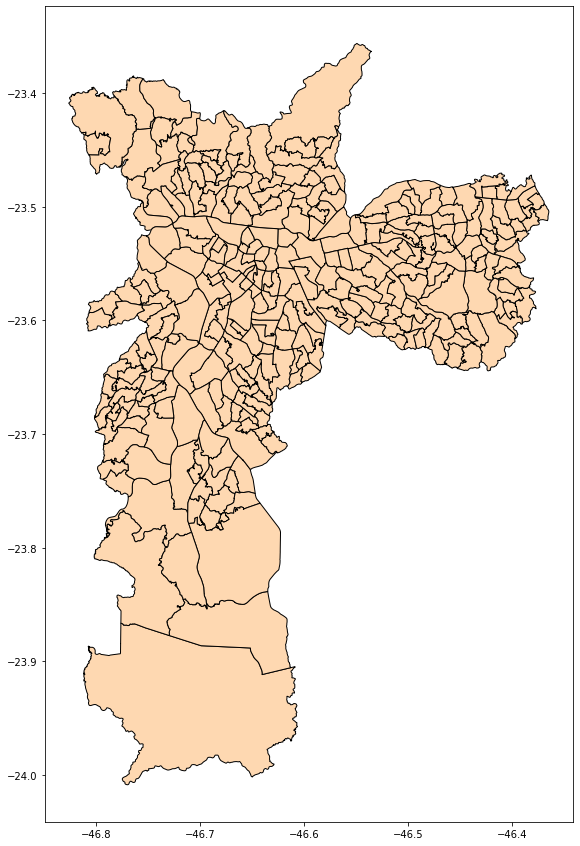

In [45]:
# Plota mapa da cidade de São Paulo por área de ponderação
fig, ax = plt.subplots(figsize=(15,15))
mapa.plot(ax = ax, facecolor = '#FED8B1', edgecolor = 'k')

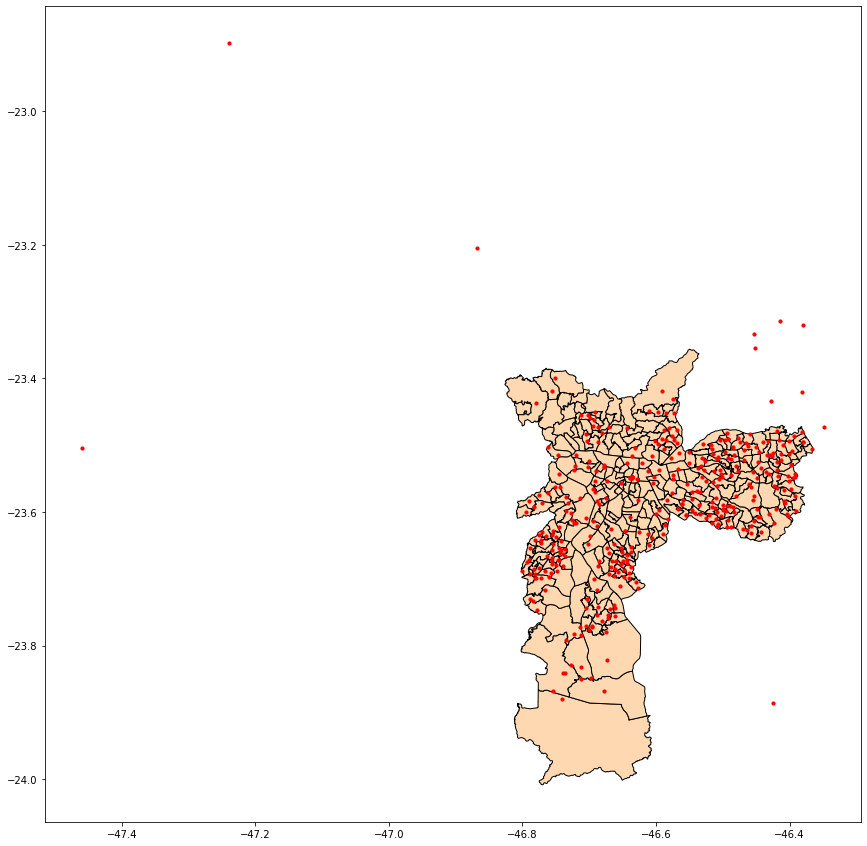

In [46]:
# Plota mapa da cidade de São Paulo por área de ponderação e apresenta localidade das UBS
# Verifiquem que alguns pontos estão localizados fora do mapa de São Paulo (dados errados)
fig, ax = plt.subplots(figsize=(15,15))
mapa.plot(ax = ax, facecolor = '#FED8B1', edgecolor = 'k')
gdf.plot(ax=ax, color='red', markersize=10);